In [1]:
import pandas as pd
A_a_1=pd.read_csv("[Nut2NHI] data_hw_ver4.csv")
A_a_1_cols=A_a_1.columns

A_a_1_cols_new=['sex','age','ID','year']

for x in A_a_1_cols:
    if x.startswith("HE"):
        A_a_1_cols_new.append(x)
       
A_a_1=A_a_1[A_a_1_cols_new]


In [2]:
#A: abandon nan in remainders of features
#d: nan changes to  mean
avg=A_a_1["HE_LDL_drct"].mean()
A_a_1=A_a_1.fillna(A_a_1.mean()["HE_LDL_drct":"HE_LDL_drct"])

#5: replace nan with median in A1bc
A_a_1=A_a_1.fillna(A_a_1.median()["HE_HbA1c":"HE_HbA1c"])



A_a_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59015 entries, 0 to 59014
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sex          59015 non-null  int64  
 1   age          59015 non-null  int64  
 2   ID           59015 non-null  object 
 3   year         59015 non-null  int64  
 4   HE_ht        55758 non-null  float64
 5   HE_wt        55796 non-null  float64
 6   HE_wc        55709 non-null  float64
 7   HE_BMI       54744 non-null  float64
 8   HE_sbp       49201 non-null  float64
 9   HE_dbp       49201 non-null  float64
 10  HE_Upro      44421 non-null  float64
 11  HE_HbA1c     59015 non-null  float64
 12  HE_glu       45377 non-null  float64
 13  HE_chol      45446 non-null  float64
 14  HE_TG        45446 non-null  float64
 15  HE_HDL_st2   45446 non-null  float64
 16  HE_LDL_drct  59015 non-null  float64
 17  HE_crea      45446 non-null  float64
 18  HE_ast       45446 non-null  float64
 19  HE_a

In [14]:
import lightgbm 
from lightgbm import LGBMRegressor
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score ,mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt


dataset_total=A_a_1
dataset_men=A_a_1[A_a_1['sex']==1]
dataset_women=A_a_1[A_a_1['sex']==2]

target_total=dataset_total["age"]
features_total=dataset_total.drop(["age","ID","year"],axis=1)

target_men=dataset_men["age"]
features_men=dataset_men.drop(["sex","age","ID","year"],axis=1)

target_women=dataset_women["age"]
features_women=dataset_women.drop(["sex","age","ID","year"],axis=1)



In [4]:
plt.rcParams["figure.figsize"] = (5, 5)

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.719051
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.084594
[LightGBM] [Debug] init for col-wise cost 0.001149 seconds, init for row-wise cost 0.003136 seconds
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004382 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2960
[LightGBM] [Info] Number of data points in the train set: 41310, number of used features: 17
[LightGBM] [Info] Start training from score 40.899395
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 325 and depth = 9
[LightGBM] [Warning] No further splits w

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 240 and depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 271 and depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 227 and depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 251 and depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 231 and depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 174 and depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 250 and depth = 9
[LightGBM] [W

Text(0, 0.5, 'predict')

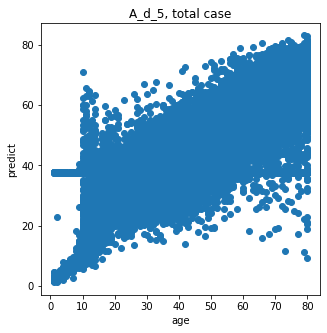

In [5]:


total_x_train, total_x_test, total_y_train, total_y_test= train_test_split(features_total,target_total,test_size=0.3,random_state=200)

lgb_reg_1 = LGBMRegressor(verbosity=50,learning_rate=0.05,boosting='gbdt',metric='regression_l2',max_depth=9,num_leaves=512,n_estimators=100) 
lgb_reg_1.fit(total_x_train, total_y_train)

# total_x_test.loc[:,'age']=total_y_test

# total_x_test=total_x_test[(total_x_test['HE_ht'].notnull())]
# total_x_test=total_x_test[(total_x_test['HE_wt'].notnull())]
# total_x_test=total_x_test[(total_x_test['HE_wc'].isnull())]
# total_x_test=total_x_test[(total_x_test['HE_BMI'].notnull())]
# total_x_test=total_x_test[(total_x_test['HE_sbp'].notnull())]
# total_x_test=total_x_test[(total_x_test['HE_dbp'].notnull())]
# total_x_test=total_x_test[(total_x_test['HE_Upro'].notnull())]
# total_x_test=total_x_test[(total_x_test['HE_HbA1c'].notnull())]
# total_x_test=total_x_test[(total_x_test['HE_glu'].notnull())]
# total_x_test=total_x_test[(total_x_test['HE_chol'].notnull())]
# total_x_test=total_x_test[(total_x_test['HE_TG'].notnull())]
# total_x_test=total_x_test[(total_x_test['HE_HDL_st2'].notnull())]
# total_x_test=total_x_test[(total_x_test['HE_LDL_drct'].notnull())]
# total_x_test=total_x_test[(total_x_test['HE_crea'].notnull())]
# total_x_test=total_x_test[(total_x_test['HE_ast'].notnull())]
# total_x_test=total_x_test[(total_x_test['HE_alt'].notnull())]



# total_y_test=total_x_test.iloc[:,[17]]
# total_x_test=total_x_test.drop(["age"],axis=1)

answer = pd.DataFrame(total_y_test.reset_index())
del answer["index"]

plt.scatter(answer,lgb_reg_1.predict(total_x_test))
plt.title("A_d_5, total case")
plt.xlabel("age")
plt.ylabel("predict")

Text(0.5, 0, 'LgihtGBM Feature of total Importance in A_d_5')

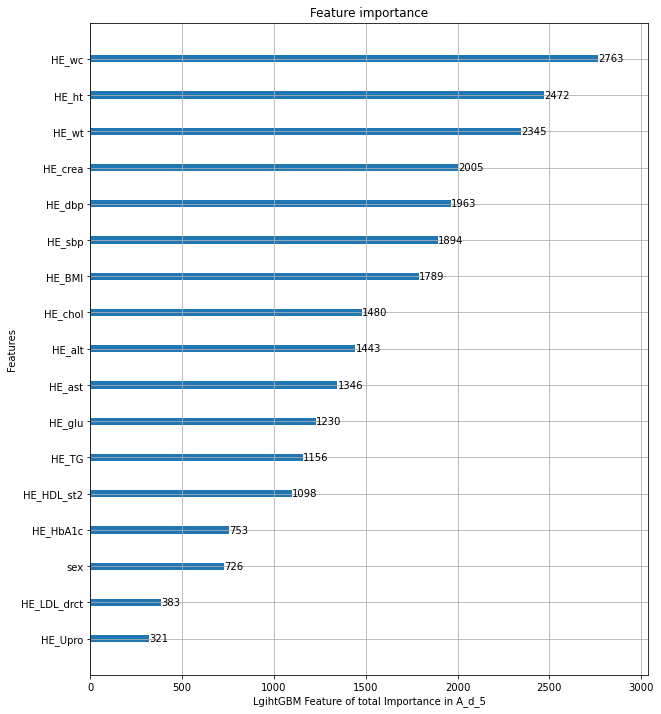

In [6]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgb_reg_1, ax=ax)
plt.xlabel("LgihtGBM Feature of total Importance in A_d_5")

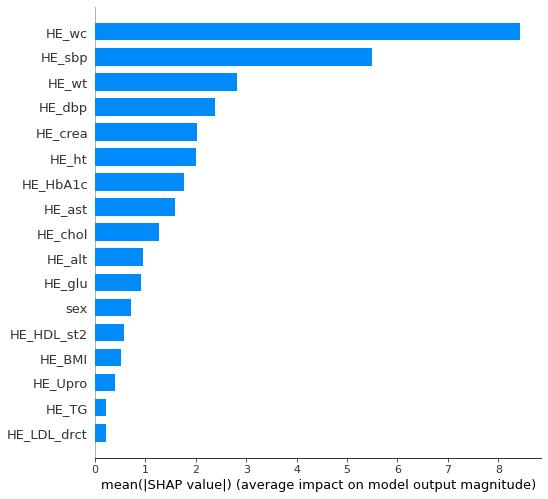

In [7]:
import shap

shap_values = shap.TreeExplainer(lgb_reg_1).shap_values(total_x_test)
shap.summary_plot(shap_values, total_x_test, plot_type="bar")

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.702642
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.087834
[LightGBM] [Debug] init for col-wise cost 0.000965 seconds, init for row-wise cost 0.003497 seconds
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004243 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2745
[LightGBM] [Info] Number of data points in the train set: 18809, number of used features: 16
[LightGBM] [Info] Start training from score 39.315806
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 249 and depth = 9
[LightGBM] [Warning] No further splits w

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 160 and depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 209 and depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 199 and depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 202 and depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 178 and depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 182 and depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 135 and depth = 9
[LightGBM] [W

Text(0, 0.5, 'predict')

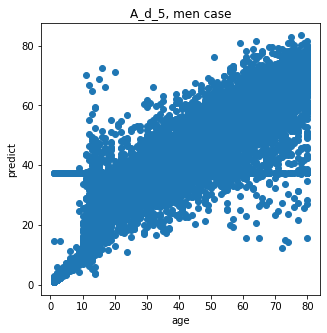

In [8]:
plt.rcParams["figure.figsize"] = (5, 5)

men_x_train, men_x_test, men_y_train, men_y_test= train_test_split(features_men,target_men,test_size=0.3,random_state=200)

lgb_reg_2 = LGBMRegressor(verbosity=50,learning_rate=0.05,boosting='gbdt',metric='regression_l2',max_depth=9,num_leaves=512,n_estimators=100) 
lgb_reg_2.fit(men_x_train, men_y_train)

answer = pd.DataFrame(men_y_test.reset_index())
del answer["index"]

plt.scatter(answer,lgb_reg_2.predict(men_x_test))
plt.title("A_d_5, men case")
plt.xlabel("age")
plt.ylabel("predict")

Text(0.5, 0, 'LgihtGBM Feature of men Importance in A_d_5')

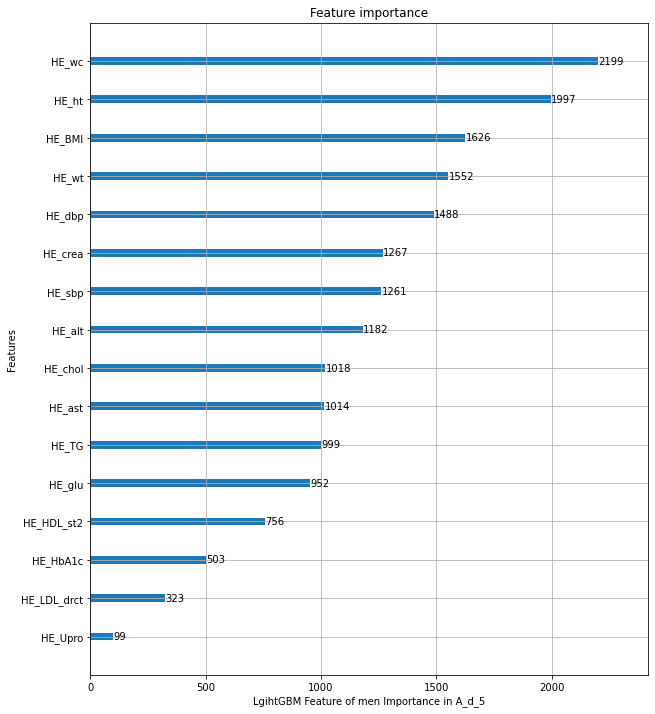

In [9]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgb_reg_2, ax=ax)
plt.xlabel("LgihtGBM Feature of men Importance in A_d_5")

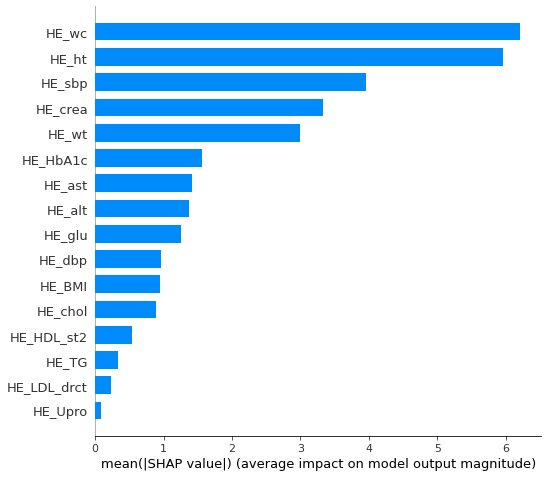

In [10]:
import shap

shap_values = shap.TreeExplainer(lgb_reg_2).shap_values(men_x_test)
shap.summary_plot(shap_values, men_x_test, plot_type="bar")

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.730568
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.091321
[LightGBM] [Debug] init for col-wise cost 0.003236 seconds, init for row-wise cost 0.003615 seconds
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004858 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2689
[LightGBM] [Info] Number of data points in the train set: 22501, number of used features: 16
[LightGBM] [Info] Start training from score 42.418915
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 317 and depth = 9
[LightGBM] [Warning] No further splits w

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 161 and depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 173 and depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 172 and depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 158 and depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 156 and depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 167 and depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 175 and depth = 9
[LightGBM] [W

Text(0, 0.5, 'predict')

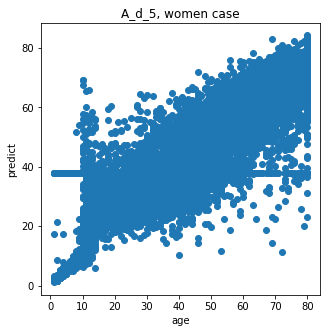

In [11]:
plt.rcParams["figure.figsize"] = (5, 5)

women_x_train, women_x_test, women_y_train, women_y_test= train_test_split(features_women,target_women,test_size=0.3,random_state=200)

lgb_reg_3 = LGBMRegressor(verbosity=50,learning_rate=0.05,boosting='gbdt',metric='regression_l2',max_depth=9,num_leaves=512,n_estimators=100)
lgb_reg_3.fit(women_x_train, women_y_train)

answer = pd.DataFrame(women_y_test.reset_index())
del answer["index"]

plt.scatter(answer,lgb_reg_3.predict(women_x_test))
plt.title("A_d_5, women case")
plt.xlabel("age")
plt.ylabel("predict")

Text(0.5, 0, 'LgihtGBM Feature of women Importance in A_d_5')

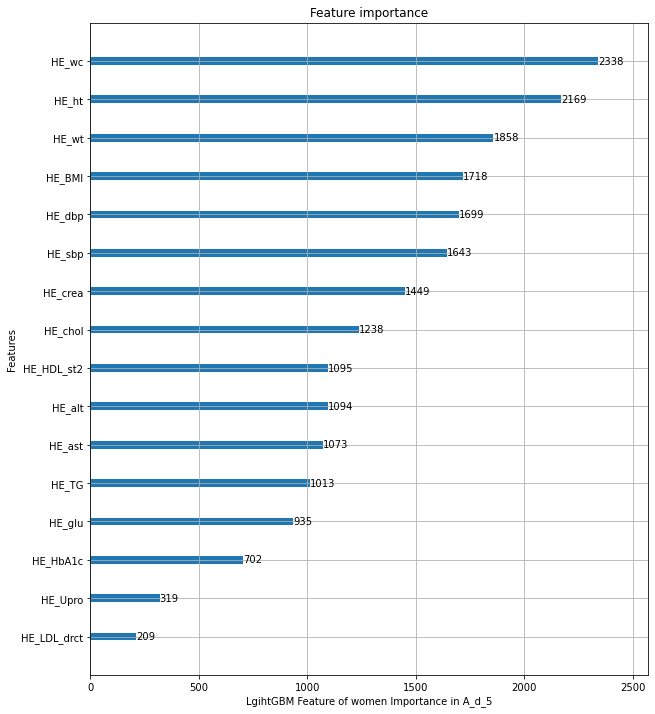

In [12]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgb_reg_3, ax=ax)
plt.xlabel("LgihtGBM Feature of women Importance in A_d_5")

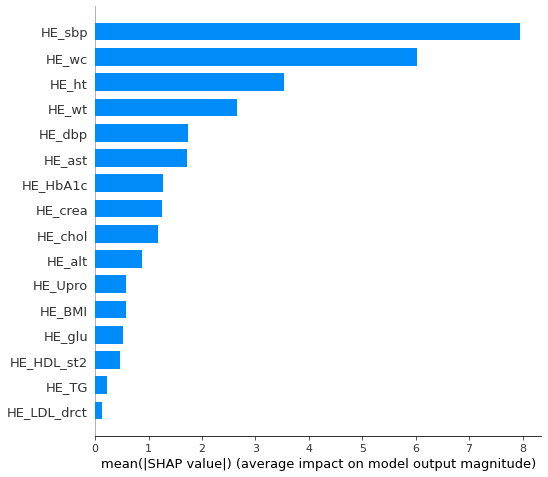

In [13]:
import shap

shap_values = shap.TreeExplainer(lgb_reg_3).shap_values(women_x_test)
shap.summary_plot(shap_values, women_x_test, plot_type="bar")